In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt
%matplotlib inline



In [5]:
df = pd.read_csv("fifa_cleaned.csv")

In [45]:
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,Messi,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,Lean,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,Normal,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,Normal,105400000.0,Napoli,82.0,LS,24.0,2010-07-01,2022,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,"#Speedster,#Dribbler,#Crosser,#Acrobat","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,Normal,106500000.0,Napoli,82.0,LCB,26.0,2014-07-01,2021,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,"#Tackling ,#Tactician ,#Strength,#Complete Def...",Power Header,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


All players in the database are ranked as we can see in the following figure

In [39]:
df.shape

(17954, 92)

(array([ 317., 1254., 2662., 3910., 5074., 3182., 1014.,  433.,   92.,
          16.]),
 array([47. , 51.7, 56.4, 61.1, 65.8, 70.5, 75.2, 79.9, 84.6, 89.3, 94. ]),
 <BarContainer object of 10 artists>)

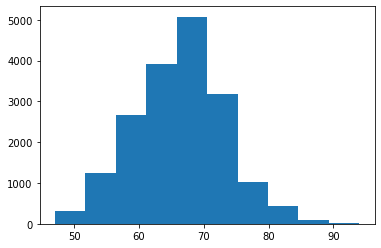

In [99]:
plt.hist(df.loc[:, "overall_rating"])


the most age of players in database  is 25

(array([1.629e+03, 3.852e+03, 3.922e+03, 3.684e+03, 2.717e+03, 1.415e+03,
        6.180e+02, 1.020e+02, 1.200e+01, 3.000e+00]),
 array([17. , 19.9, 22.8, 25.7, 28.6, 31.5, 34.4, 37.3, 40.2, 43.1, 46. ]),
 <BarContainer object of 10 artists>)

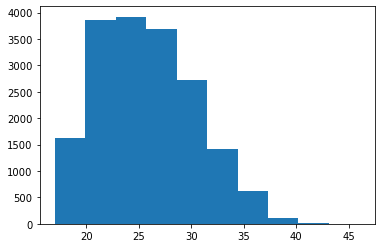

In [100]:
plt.hist(df.loc[:, "age"])

(array([ 4173.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13781.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

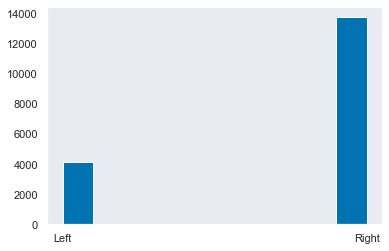

In [26]:
plt.hist(df.loc[:, "preferred_foot"])

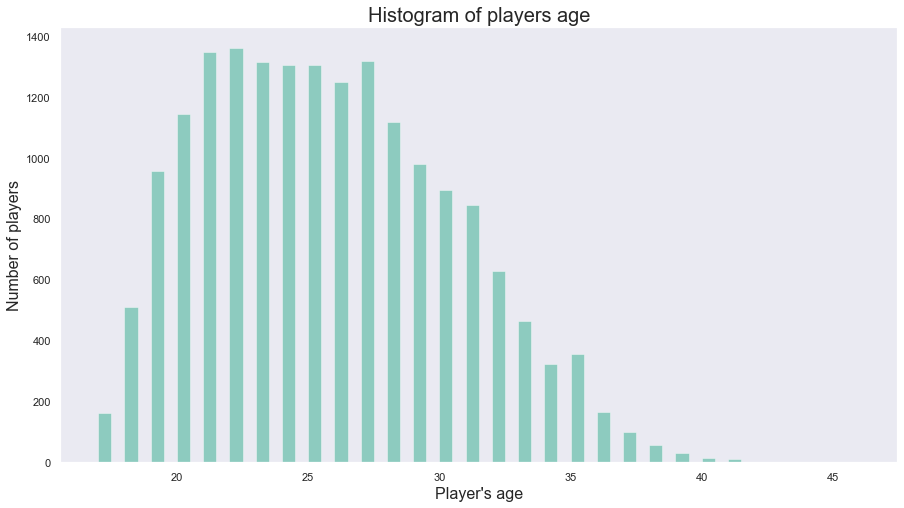

In [31]:
sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = df.age
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

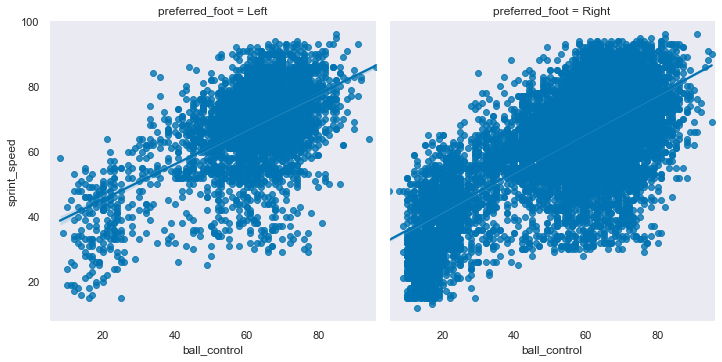

In [36]:
sns.lmplot(x = 'ball_control', y = 'sprint_speed', data = df, col = 'preferred_foot')


<AxesSubplot:xlabel='weight_kgs', ylabel='agility'>

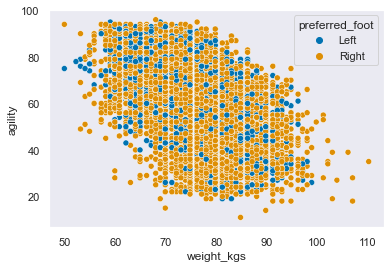

In [38]:
sns.scatterplot(x=df['weight_kgs'], y=df['agility'], hue=df['preferred_foot'])

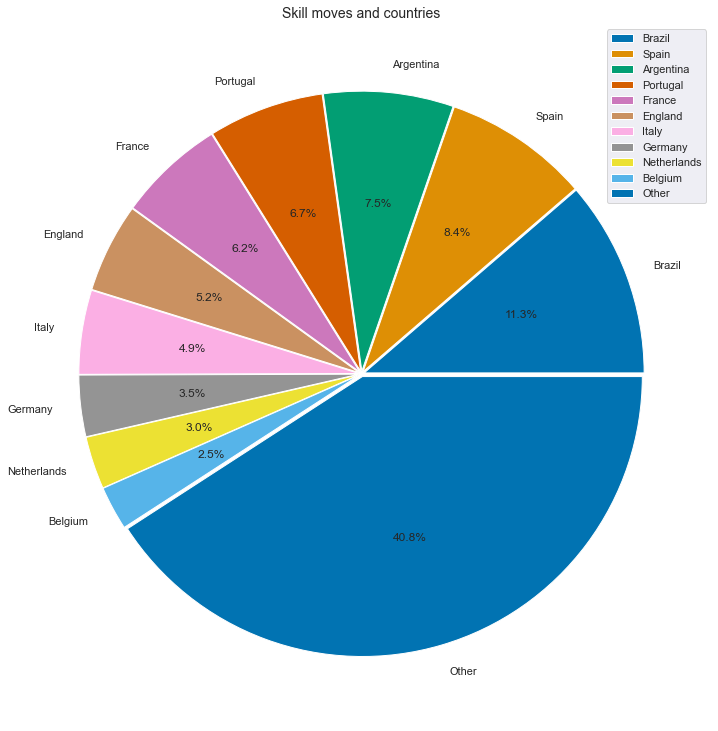

In [149]:
skillers = df[(df["skill_moves(1-5)"] == 4) | (df["skill_moves(1-5)"] == 5)]
skiller_nations = skillers["nationality"].value_counts(normalize=True)
rest = skiller_nations[10:].sum()
skiller_nations = skiller_nations[:10]
skiller_nations["Other"] = rest
pie, ax = plt.subplots(figsize=[12,12])
labels = skiller_nations.keys()
plt.pie(x=skiller_nations, autopct="%.1f%%", labels=labels, pctdistance=0.6, explode=[0.01]*11);
plt.legend(loc="upper right")
plt.title("Skill moves and countries", fontsize=14);

<AxesSubplot:xlabel='age', ylabel='weight_kgs'>

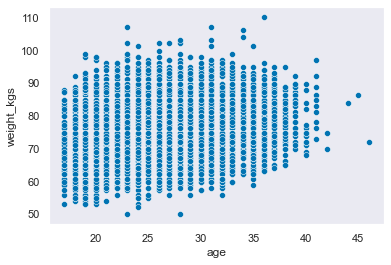

In [44]:
sns.scatterplot(x=df['age'], y=df['weight_kgs'])